In [127]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as crs
import geoviews
import holoviews as hv
import hvplot.xarray  # noqa
xr.set_options(display_style="html");

## Load 
Load netcdfs of 21st century predictions of melt rates across Antartica for two RCP scenarios, from Trusel et al., 2015, and combine into one dataarray, 


In [67]:
s45 = xr.open_dataarray('snm_truselNatGeosci2015_rcp45_rcp85/snm_CMIP5-CLM4-EnsembleMean_truselNatGeosci2015_rcp45.nc')
s85 = xr.open_dataarray('snm_truselNatGeosci2015_rcp45_rcp85/snm_CMIP5-CLM4-EnsembleMean_truselNatGeosci2015_rcp85.nc')
s = xr.concat([s45, s85],pd.Index([4.5, 8.5], name='rcp'))


## A little tidying
Add coordinates x and y, which align with the dimensions x and y.
Also replace the very large -ve values with nans

In [68]:
s['x']  = ('x', s.x)
s['y'] =  ('y', s.y)
s=s.where(s > -2e9 , np.nan)
s

<xarray.DataArray 'snm' (rcp: 2, time: 94, y: 97, x: 125)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]], dtype=float32)
Coordinates:
    lat      (y, x) float64 -56.27 -56.58 -56.9 -57.21 ... -56.69 -56.34 -56.0
    lon      (y, x) float64 60.02 59.61 59.2 58.77 ... -115.3 -114.9 -114.4
  * time     (time) object 2007-02-15 00:00:00 ... 2100-02-15 00:00:00
  * rcp      (rcp) float64 4.5 8.5
  * x        (x) int64 0 1 2 3 4 5 6 7 8 ... 116 117 118 119 120 121 122 123 124
  * y        (y) int64 0 1 2 3 4 5 6

## Plotting by extracting the values from the dataarray and plotting woth matplotlib

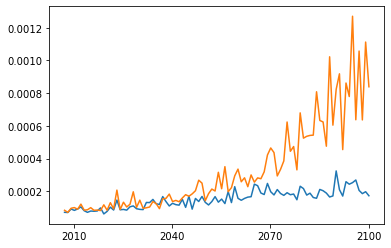

In [69]:
s_i_45 = s.isel(x=50, y=50, rcp=0)
s_i_85 = s.isel(x=50, y=50, rcp=1)
plt.plot(s_i_45.time.data, s_i_45.data,s_i_85.time.data, s_i_85.data);

## Plotting with xarray's build-in plotting function. This is nicer because it automatically adds labels and a title.

In [96]:
s.isel(x = 50, y =50, rcp=0).hvplot()



:Curve   [time]   (snm)

In [97]:
s.isel(x = 50, y =50, rcp=[0,1]).hvplot.line(x='time')


:NdOverlay   [rcp]
   :Curve   [time]   (snm)

## The two examples above used isel to select values in x, y and rcp based on their index, yo can also use sel to choose them based on their values. Because x and y = 0,1,2,3..... they are actually equal to their indexes, but rcp is not. THe example below uses sel

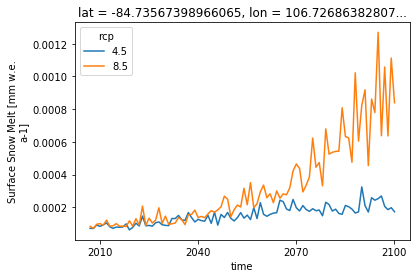

In [71]:
s.sel(x = 50, y =50, rcp=[4.5, 8.5]).plot.line(x='time');

## finally, another way is to use a more matlab style of indexing that requires us to remembr the order of the dimensions

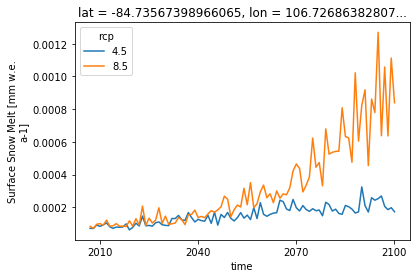

In [91]:
s[:, :, 50, 50].plot.line(x='time');

## You do need to get the value of the index exactly right if you add the extra input method='nearest' (this only works if you have a coordinate associated with the dimension

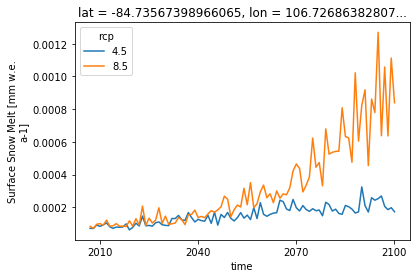

In [73]:
s.sel(x = 50.1, y = 49.8, rcp=[4.51, 8.52], method='nearest').plot.line(x='time')  ;

## 2d plotting

In [105]:
s.isel(time=30,rcp=0).hvplot(width=500)

:Image   [y,x]   (snm)

In [147]:
p45 = s.sel(rcp=4.5).hvplot(width=500, groupby='time', widget_type='scrubber', 
                             widget_location='bottom',clim =(0, 200))
p85 = s.sel(rcp=8.5).hvplot(width=500, groupby='time', widget_type='scrubber', 
                             widget_location='bottom',clim =(0, 200))

p85 

Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=93, width=550)
        [2] HSpacer()

In [170]:
SPstereo = crs.SouthPolarStereo(0.0, globe=None)
Perspective = crs.NearsidePerspective(central_longitude=0.0, central_latitude=-75, satellite_height=35785831, false_easting=0, false_northing=0, globe=None)


s.isel(rcp=1, time = slice(0,2)).hvplot.quadmesh(
    'lon', 'lat', projection=SPstereo, project=True, global_extent=False, 
    cmap='viridis', rasterize=True, dynamic=True, coastline=True, 
    frame_width=500, widget_location='bottom', widget_type='scrubber',clim =(0, 200))


Column
    [0] HoloViews(DynamicMap, widget_location='bottom', widget_type='scrubber')
    [1] Row
        [0] HSpacer()
        [1] WidgetBox
            [0] Player(end=1, width=550)
        [2] HSpacer()

In [161]:
air_ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## below here is the start of working through this:
http://xarray.pydata.org/en/stable/examples/multidimensional-coords.html?highlight=multidimensional

In [78]:
print(s.lat.attrs)
print(s.lon.attrs)

{'standard_name': 'latitude', 'long_name': 'latitude', 'units': 'degrees_north', '_CoordinateAxisType': 'Lat'}
{'standard_name': 'longitude', 'long_name': 'longitude', 'units': 'degrees_east', '_CoordinateAxisType': 'Lon'}


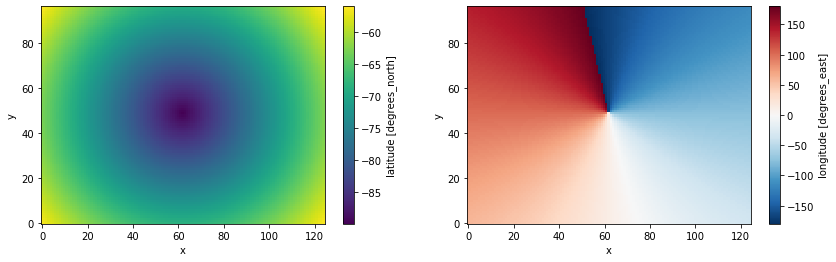

In [79]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
s.lat.plot(ax=ax1)
s.lon.plot(ax=ax2)

Examples from xarray plotting documentation page